# Machine Learning for PHP

Prediction of Thermal Resistance and Temperature Drop

In [51]:
# loading ml module
from ml_solution_module import MachineLearning

In [52]:
# assigning to variable and setting output path
ml = MachineLearning("data/")

data/ml_result already exists and ML reuslts will be stored here.


In [53]:
# preparing data and adding sample and FR informationto analysed data
# run this with different FR and Sample name (from experimenal data)
df_w_60 = ml.data_prep('data/di_water_exp/60_FR/gfe_combined.csv', sample='DI Water', fr=60)
df_w_40 = ml.data_prep('data/di_water_exp/40_FR/gfe_combined.csv', sample='DI Water', fr=40)
df_a_40 = ml.data_prep('data/al2o3_diwater_exp/40_FR/gfe_combined.csv', sample='Al2O3 DI Water', fr=40)
df_a_60 = ml.data_prep('data/al2o3_diwater_exp/60_FR/gfe_combined.csv', sample='Al2O3 DI Water', fr=60)

Compiled data stored at data/ml_result/all_combined_data_DI Water_60.csv
Compiled data stored at data/ml_result/all_combined_data_DI Water_40.csv
Compiled data stored at data/ml_result/all_combined_data_Al2O3 DI Water_40.csv
Compiled data stored at data/ml_result/all_combined_data_Al2O3 DI Water_60.csv


## Data Cleaning
removing all data for Te>435[K] (refer ml_solution.ipynb for raw data EDA)

In [54]:
df_a_40_clean = ml.data_filter_Te(df_a_40, cutoff=345)
df_a_60_clean = ml.data_filter_Te(df_a_60, cutoff=345)
df_w_40_clean = ml.data_filter_Te(df_w_40, cutoff=345)
df_w_60_clean = ml.data_filter_Te(df_w_60, cutoff=345)

In [55]:
# data compile
df = ml.data_compile()

All data compiled in a single csv file and saved at: data/ml_result as super_combined_data.csv


In [56]:
df_clean = ml.data_filter_Te(df, cutoff=345)

In [57]:
df_clean

,Unnamed: 0,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG[KJ/mol],Fluid,FR
0,0,0.0,298.150000,296.65,1.500000,0.413299,0.018750,-2190.243835,-2179.224665,-11.019171,DI Water,60
1,1,0.5,297.816667,296.65,1.166667,0.413299,0.014583,-2187.795131,-2179.224665,-8.570466,DI Water,60
2,2,1.0,298.150000,296.40,1.750000,0.413299,0.021875,-2190.243835,-2177.388136,-12.855699,DI Water,60
3,3,1.5,300.150000,296.40,3.750000,0.413299,0.046875,-2204.936063,-2177.388136,-27.547927,DI Water,60
4,4,2.0,302.150000,296.40,5.750000,0.413299,0.071875,-2219.628291,-2177.388136,-42.240154,DI Water,60
...,...,...,...,...,...,...,...,...,...,...,...,...
1721,388,11.5,339.150000,312.40,26.750000,0.579952,0.334375,-1536.196543,-1415.031107,-121.165436,DI Water,40
1722,389,12.0,340.816667,313.65,27.166667,0.613283,0.339583,-1385.405731,-1274.974349,-110.431383,DI Water,40
1723,390,12.5,342.150000,312.90,29.250000,0.613283,0.365625,-1390.825677,-1271.925630,-118.900047,DI Water,40
1724,391,13.0,343.150000,314.65,28.500000,0.613283,0.356250,-1394.890635,-1279.039308,-115.851328,DI Water,40


## Exploratory Data Analysis

Data visualisation

## checking distrubution

<Axes: xlabel='dG[KJ/mol]', ylabel='Density'>

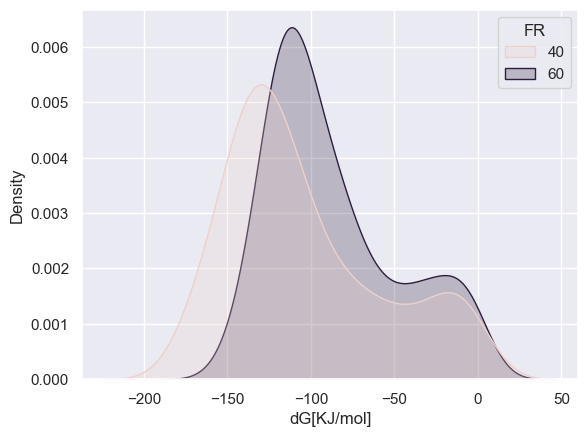

In [58]:
import seaborn as sns
sns.kdeplot(x=df_clean['dG[KJ/mol]'], hue=df['FR'], fill=True)

<Axes: xlabel='dG[KJ/mol]', ylabel='Density'>

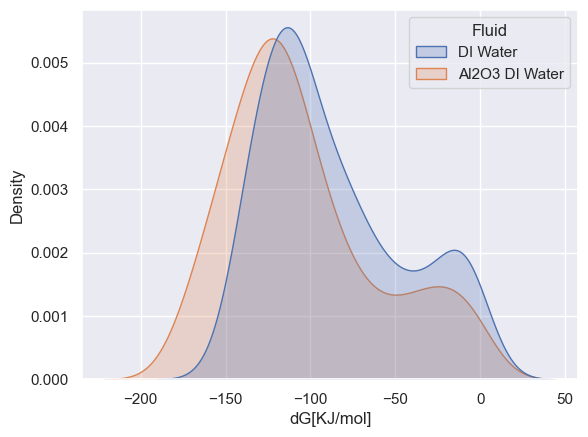

In [59]:
sns.kdeplot(x=df_clean['dG[KJ/mol]'], hue=df['Fluid'], fill=True)

<Axes: xlabel='TR[K/W]', ylabel='Density'>

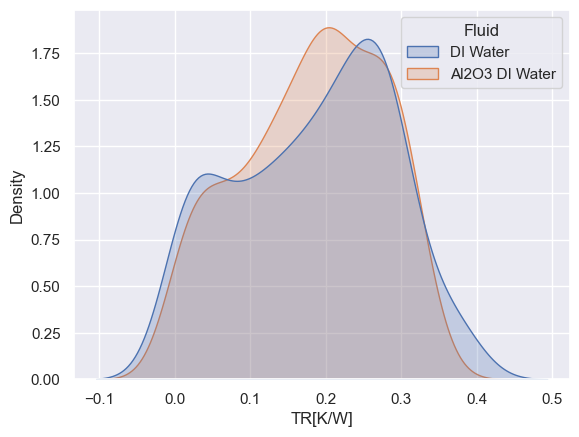

In [60]:
sns.kdeplot(x=df_clean['TR[K/W]'], hue=df['Fluid'], fill=True)

<Axes: xlabel='TR[K/W]', ylabel='Density'>

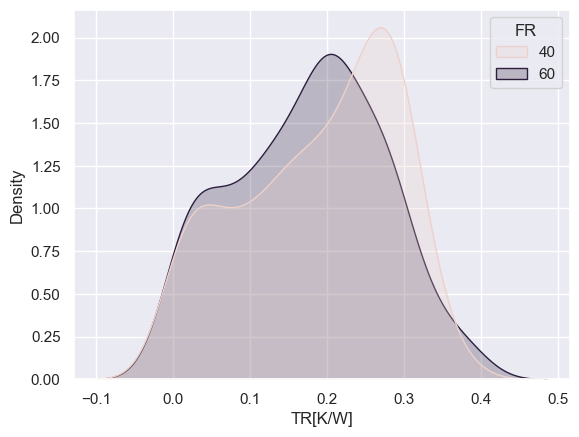

In [61]:
sns.kdeplot(x=df_clean['TR[K/W]'], hue=df['FR'], fill=True)

## Plotting Data

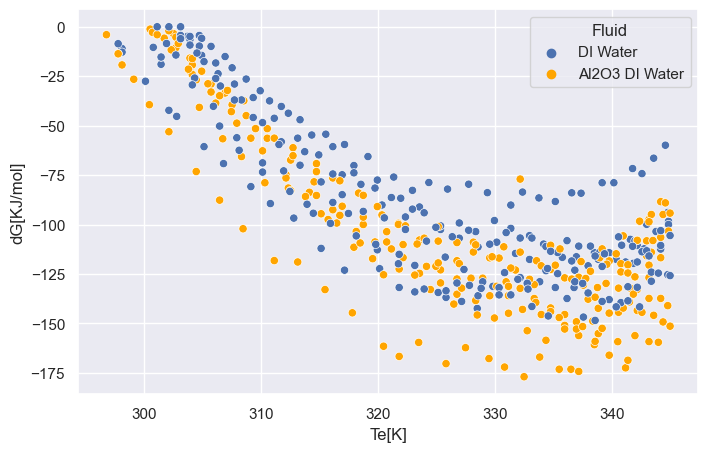

In [62]:
ml.etl_visual(df_clean,y_value='dG[KJ/mol]',hue='Fluid',point=['b', 'orange'])

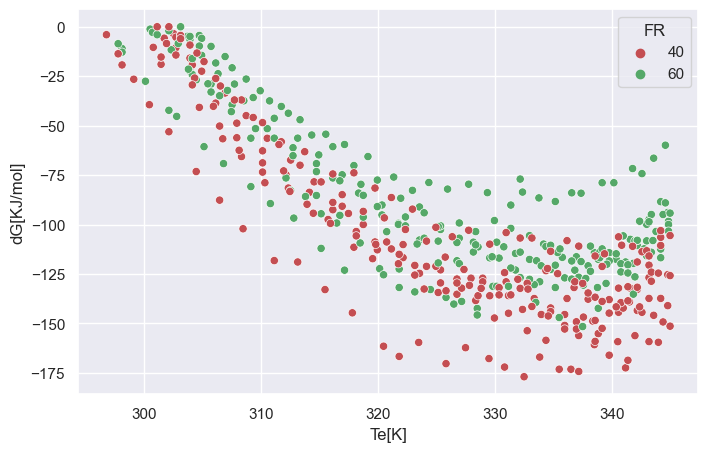

In [63]:
ml.etl_visual(df_clean,y_value='dG[KJ/mol]',hue='FR',point=['r', 'g'])

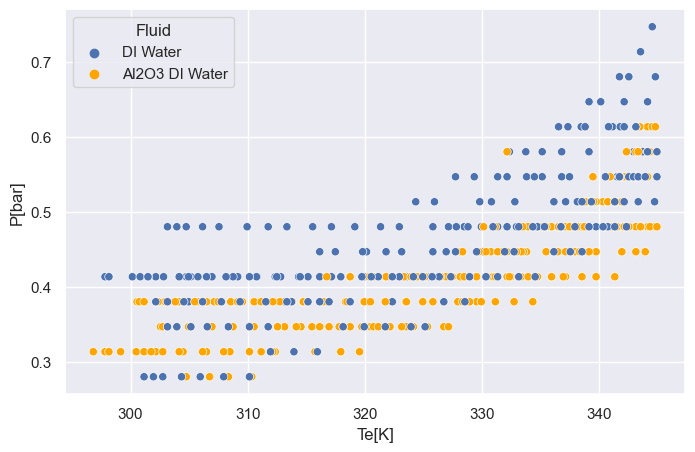

In [64]:
ml.etl_visual(df_clean,y_value='P[bar]',hue='Fluid',point=['b', 'orange'])

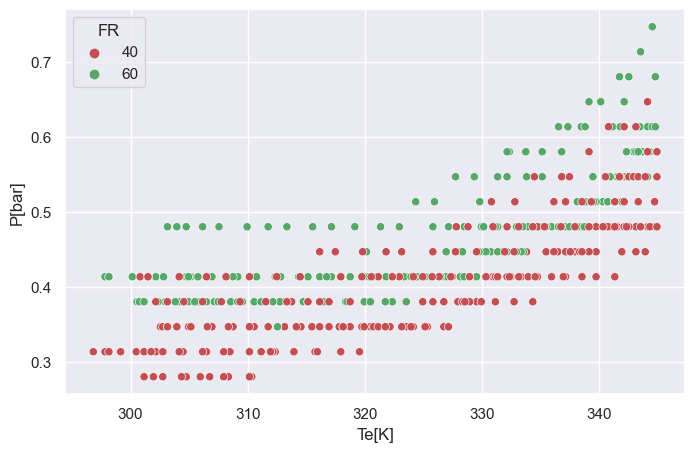

In [65]:
ml.etl_visual(df_clean,y_value='P[bar]',hue='FR',point=['r', 'g'])

## Combine comparision plotting

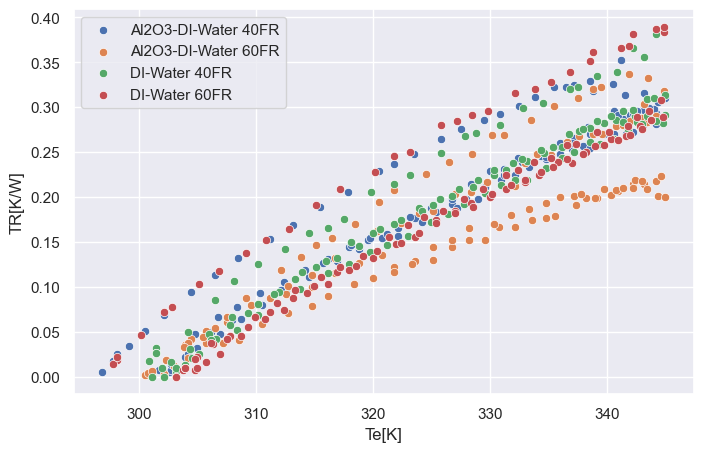

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
# plotting Thermal resistance
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_a_40_clean['Te[K]'], y=df_a_40_clean['TR[K/W]'], label='Al2O3-DI-Water 40FR')
sns.scatterplot(x=df_a_60_clean['Te[K]'], y=df_a_60_clean['TR[K/W]'], label='Al2O3-DI-Water 60FR')
sns.scatterplot(x=df_w_40_clean['Te[K]'], y=df_w_40_clean['TR[K/W]'], label='DI-Water 40FR')
sns.scatterplot(x=df_w_60_clean['Te[K]'], y=df_w_60_clean['TR[K/W]'], label='DI-Water 60FR')

plt.legend()

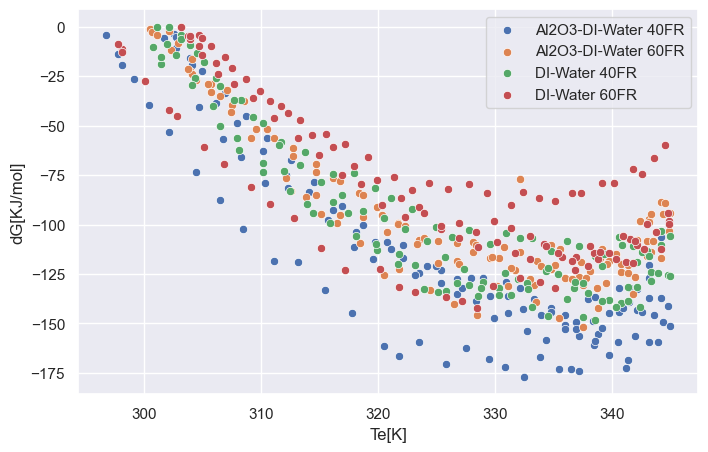

In [67]:
# plotting dG
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_a_40_clean['Te[K]'], y=df_a_40_clean['dG[KJ/mol]'], label='Al2O3-DI-Water 40FR')
sns.scatterplot(x=df_a_60_clean['Te[K]'], y=df_a_60_clean['dG[KJ/mol]'], label='Al2O3-DI-Water 60FR')
sns.scatterplot(x=df_w_40_clean['Te[K]'], y=df_w_40_clean['dG[KJ/mol]'], label='DI-Water 40FR')
sns.scatterplot(x=df_w_60_clean['Te[K]'], y=df_w_60_clean['dG[KJ/mol]'], label='DI-Water 60FR')
plt.legend()

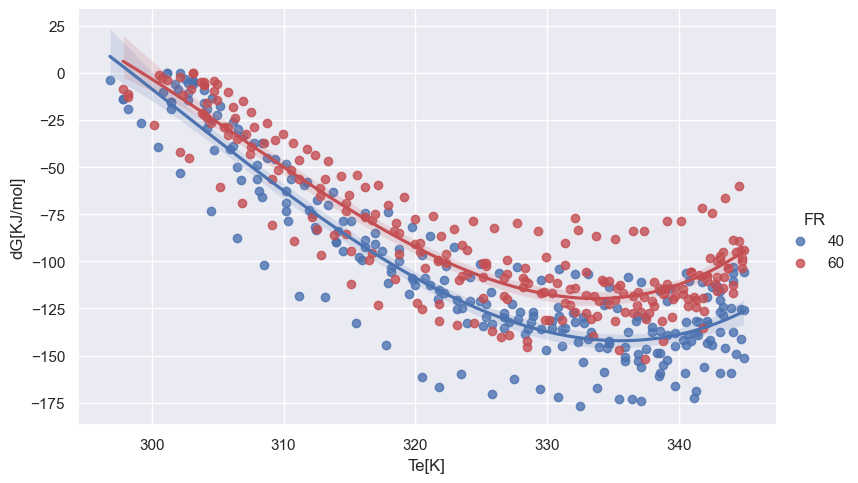

In [68]:
sns.lmplot(x='Te[K]', y='dG[KJ/mol]', data=df_clean, order=3, aspect=1.6, hue='FR', palette=['b','r'])

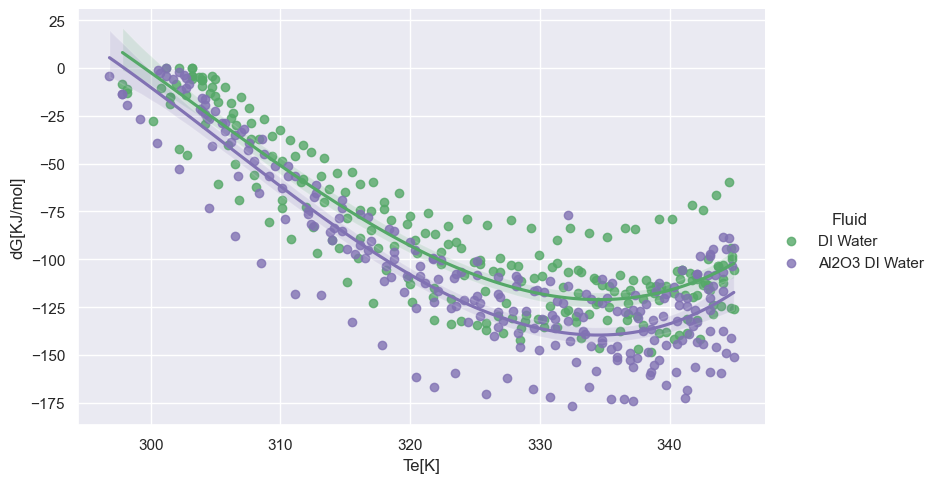

In [69]:
sns.lmplot(x='Te[K]', y='dG[KJ/mol]', data=df_clean, order=3, aspect=1.6, hue='Fluid', palette=['g','m'])

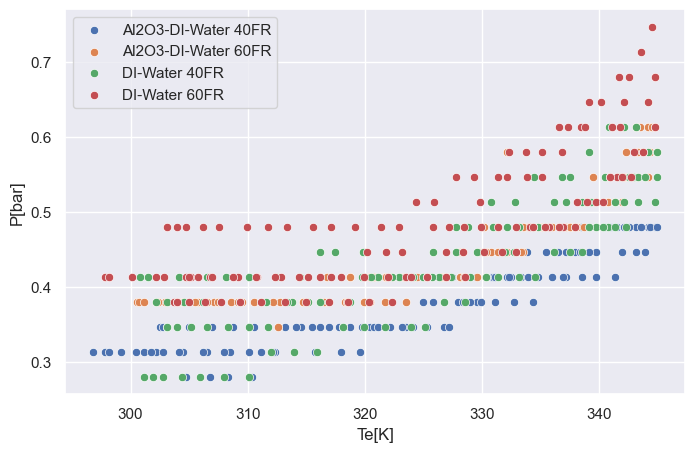

In [70]:
# plotting pressure
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_a_40_clean['Te[K]'], y=df_a_40_clean['P[bar]'], label='Al2O3-DI-Water 40FR')
sns.scatterplot(x=df_a_60_clean['Te[K]'], y=df_a_60_clean['P[bar]'], label='Al2O3-DI-Water 60FR')
sns.scatterplot(x=df_w_40_clean['Te[K]'], y=df_w_40_clean['P[bar]'], label='DI-Water 40FR')
sns.scatterplot(x=df_w_60_clean['Te[K]'], y=df_w_60_clean['P[bar]'], label='DI-Water 60FR')
plt.legend()

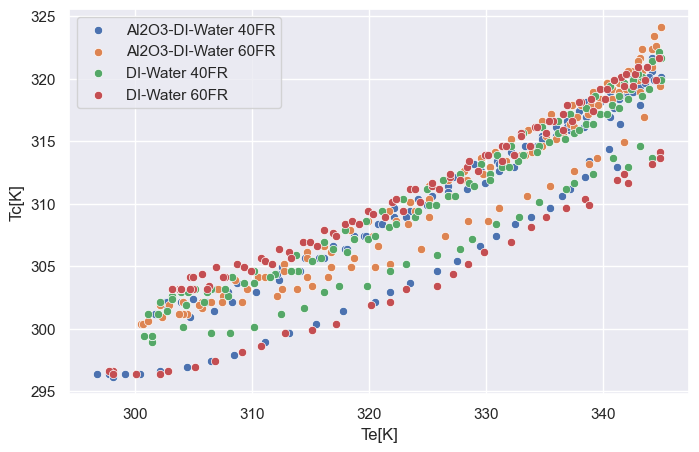

In [71]:
# plotting Tc
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_a_40_clean['Te[K]'], y=df_a_40_clean['Tc[K]'], label='Al2O3-DI-Water 40FR')
sns.scatterplot(x=df_a_60_clean['Te[K]'], y=df_a_60_clean['Tc[K]'], label='Al2O3-DI-Water 60FR')
sns.scatterplot(x=df_w_40_clean['Te[K]'], y=df_w_40_clean['Tc[K]'], label='DI-Water 40FR')
sns.scatterplot(x=df_w_60_clean['Te[K]'], y=df_w_60_clean['Tc[K]'], label='DI-Water 60FR')
plt.legend()

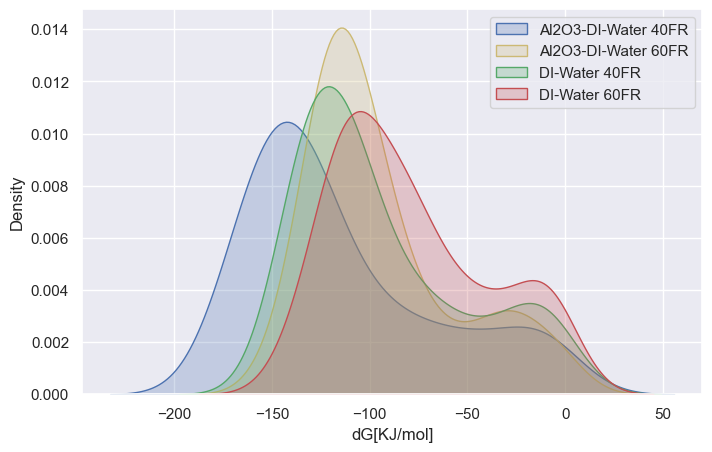

In [72]:
# distrubution overlap for dG
plt.figure(figsize=(8,5))
sns.kdeplot(x=df_a_40_clean['dG[KJ/mol]'], fill=True, color='b', label='Al2O3-DI-Water 40FR')
sns.kdeplot(x=df_a_60_clean['dG[KJ/mol]'], fill=True, color='y', label='Al2O3-DI-Water 60FR')
sns.kdeplot(x=df_w_40_clean['dG[KJ/mol]'], fill=True, color='g', label='DI-Water 40FR')
sns.kdeplot(x=df_w_60_clean['dG[KJ/mol]'], fill=True, color='r', label='DI-Water 60FR')
plt.legend()

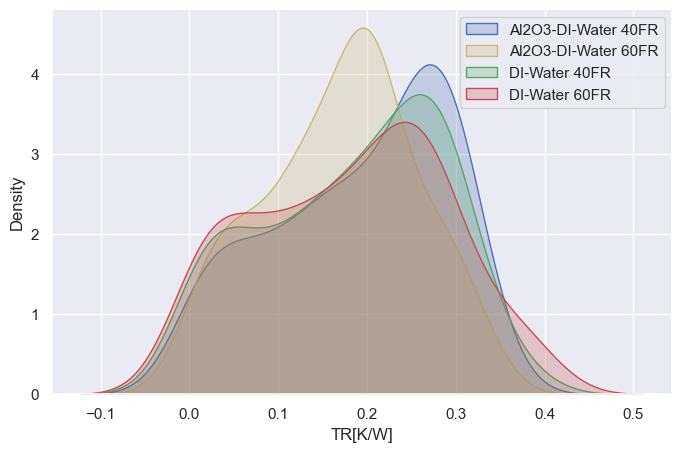

In [73]:
# distrubution overlap for TR
plt.figure(figsize=(8,5))
sns.kdeplot(x=df_a_40_clean['TR[K/W]'], fill=True, color='b', label='Al2O3-DI-Water 40FR')
sns.kdeplot(x=df_a_60_clean['TR[K/W]'], fill=True, color='y', label='Al2O3-DI-Water 60FR')
sns.kdeplot(x=df_w_40_clean['TR[K/W]'], fill=True, color='g', label='DI-Water 40FR')
sns.kdeplot(x=df_w_60_clean['TR[K/W]'], fill=True, color='r', label='DI-Water 60FR')
plt.legend()

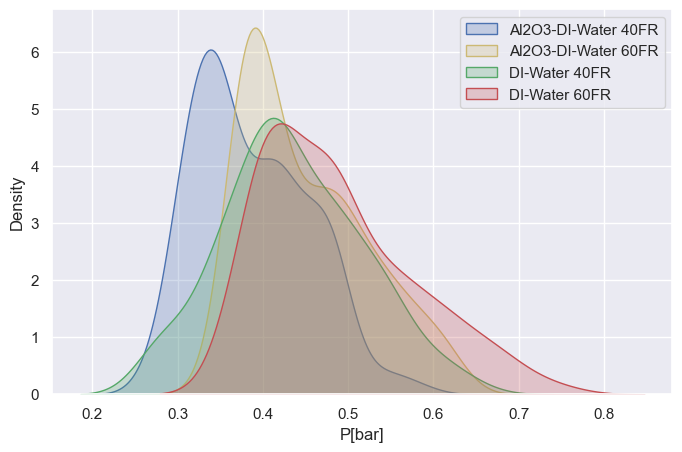

In [74]:
# distrubution overlap for Pressure
plt.figure(figsize=(8,5))
sns.kdeplot(x=df_a_40_clean['P[bar]'], fill=True, color='b', label='Al2O3-DI-Water 40FR')
sns.kdeplot(x=df_a_60_clean['P[bar]'], fill=True, color='y', label='Al2O3-DI-Water 60FR')
sns.kdeplot(x=df_w_40_clean['P[bar]'], fill=True, color='g', label='DI-Water 40FR')
sns.kdeplot(x=df_w_60_clean['P[bar]'], fill=True, color='r', label='DI-Water 60FR')
plt.legend()

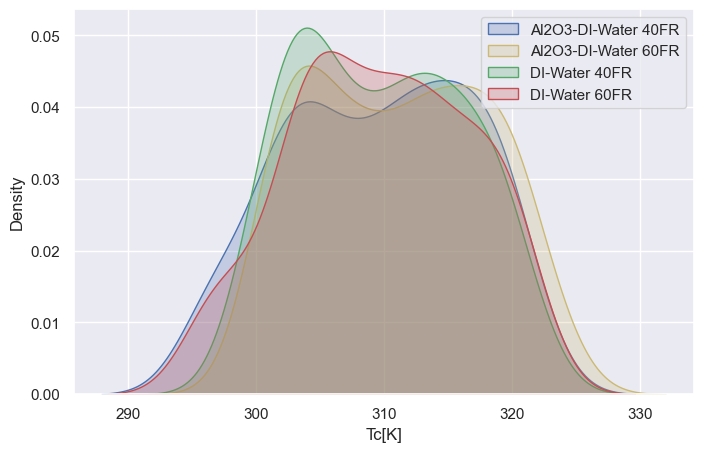

In [75]:
# distrubution overlap Tc
plt.figure(figsize=(8,5))
sns.kdeplot(x=df_a_40_clean['Tc[K]'], fill=True, color='b', label='Al2O3-DI-Water 40FR')
sns.kdeplot(x=df_a_60_clean['Tc[K]'], fill=True, color='y', label='Al2O3-DI-Water 60FR')
sns.kdeplot(x=df_w_40_clean['Tc[K]'], fill=True, color='g', label='DI-Water 40FR')
sns.kdeplot(x=df_w_60_clean['Tc[K]'], fill=True, color='r', label='DI-Water 60FR')
plt.legend()